In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

In [2]:
dataframe = pd.read_excel('Data Awal.xlsx')
dataframe.head()

,Nama,Email,Alamat Domisili,Provinsi Domisili,Kota Domisili,Kecamatan Domisili,Kelurahan Domisili,Alamat Ktp,Provinsi Ktp,Kota Ktp,...,Waktu Daftar,Tanggal Daftar,Bulan Daftar,Tahun Daftar,Status,Jenis Kelamin,Gaji Yang Diharapkan,Status Kelengkapan,Agama,Tahapan
0,Indriyani,yaniindri8298@gmail.com,Jl. Duri B VII No. 7 RT/003 RW/004,DKI Jakarta,Kota Jakarta Pusat,Gambir,Duri Pulo,Jl. Duri B VII No. 7 RT/003 RW/004,DKI Jakarta,Kota Jakarta Pusat,...,2022-02-22 06:24:11,2022-02-22,February,2022,BANK DATA,Perempuan,Rp 5.000.000 - Rp 6.000.000,Lengkap,Islam,Tolak
1,Indriyani,indriyani.indri294@gmail.com,Serua Residence Blok A1 E1 Jalan Cinangka Bojo...,Jawa Barat,Kota Depok,Bojongsari,Pondok Petir,Cidodol RT 013 / RW 006 Grogol Selatan Kebayor...,DKI Jakarta,Kota Jakarta Selatan,...,2022-02-17 13:16:28,2022-02-17,February,2022,BANK DATA,Perempuan,-,Tidak Lengkap,Islam,Tolak
2,Rima Rahmawati,rimaarahma@gmail.com,"Jl. Bendungan Hilir No. 13, Kel. Bendungan Hil...",Banten,Kota Tangerang Selatan,Ciputat,Ciputat,"Jl. Kusuma Bhakti No. 49, Kel. Kubu Gulai Banc...",Sumatera Barat,Kota Bukittinggi,...,2022-02-22 09:22:22,2022-02-22,February,2022,BANK DATA,Perempuan,Sesuai standar UMP/UMR daerah,Lengkap,Islam,Diajukan
3,Siti nuraisyah,ainursiti14@gmail.com,"Kp bambu baru, RT013/003",Banten,Kab. Tangerang,Pakuhaji,Rawa Boni,"Kp bambu baru, RT013/003",Banten,Kab. Tangerang,...,2022-02-12 16:07:05,2022-02-12,February,2022,BANK DATA,Perempuan,Sesuai standar UMP/UMR daerah,Lengkap,Islam,Diajukan
4,Fitrianah,Fitrianahhh14@gmail.com,Kp.keranggan,Banten,Kota Tangerang Selatan,Setu,Keranggan,Kp.keranggan,Banten,Kota Tangerang Selatan,...,2022-02-19 07:48:48,2022-02-19,February,2022,MITRA,Perempuan,Sesuai standar UMP/UMR daerah,Lengkap,Islam,Diajukan


In [3]:
dataframe.shape

(1155, 35)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nama                  1155 non-null   object 
 1   Email                 1155 non-null   object 
 2   Alamat Domisili       1121 non-null   object 
 3   Provinsi Domisili     1094 non-null   object 
 4   Kota Domisili         1094 non-null   object 
 5   Kecamatan Domisili    553 non-null    object 
 6   Kelurahan Domisili    551 non-null    object 
 7   Alamat Ktp            1107 non-null   object 
 8   Provinsi Ktp          1061 non-null   object 
 9   Kota Ktp              1061 non-null   object 
 10  Kecamatan Ktp         535 non-null    object 
 11  Kelurahan Ktp         534 non-null    object 
 12  Tempat Lahir          1124 non-null   object 
 13  Tanggal Lahir         1124 non-null   object 
 14  Usia                  1121 non-null   float64
 15  Telp 1               

In [5]:
dataframe.isnull().sum()

Nama                      0
Email                     0
Alamat Domisili          34
Provinsi Domisili        61
Kota Domisili            61
Kecamatan Domisili      602
Kelurahan Domisili      604
Alamat Ktp               48
Provinsi Ktp             94
Kota Ktp                 94
Kecamatan Ktp           620
Kelurahan Ktp           621
Tempat Lahir             31
Tanggal Lahir            31
Usia                     34
Telp 1                    1
Telp 2                  701
Tingkat Pendidikan       12
Institut Pendidikan      12
Bidang Pendidikan        12
Tahun Lulus              12
Nilai Akhir              12
Posisi Yang Dilamar       0
Level                     0
Pengalaman Pekerjaan      0
Waktu Daftar              0
Tanggal Daftar            0
Bulan Daftar              0
Tahun Daftar              0
Status                    0
Jenis Kelamin            31
Gaji Yang Diharapkan    511
Status Kelengkapan        0
Agama                    31
Tahapan                   0
dtype: int64

In [6]:
df = dataframe.drop(['Nama', 'Email', 'Alamat Domisili', 'Provinsi Domisili', 'Kecamatan Domisili', 'Kelurahan Domisili', 'Alamat Ktp', 'Provinsi Ktp', 'Kota Ktp', 'Kecamatan Ktp', 'Kelurahan Ktp', 'Tempat Lahir', 'Tanggal Lahir', 'Telp 1', 'Telp 2', 'Institut Pendidikan', 'Bidang Pendidikan', 'Tahun Lulus', 'Nilai Akhir', 'Level', 'Waktu Daftar', 'Tanggal Daftar', 'Bulan Daftar', 'Status', 'Tahun Daftar', 'Gaji Yang Diharapkan', 'Agama'], axis=1)
df.head()

,Kota Domisili,Usia,Tingkat Pendidikan,Posisi Yang Dilamar,Pengalaman Pekerjaan,Jenis Kelamin,Status Kelengkapan,Tahapan
0,Kota Jakarta Pusat,24.0,S1,Telemarketing,Ada,Perempuan,Lengkap,Tolak
1,Kota Depok,22.0,S1,Telemarketing,Ada,Perempuan,Tidak Lengkap,Tolak
2,Kota Tangerang Selatan,24.0,S1,Telemarketing,Ada,Perempuan,Lengkap,Diajukan
3,Kab. Tangerang,25.0,SMA/SMK,Telesales,Ada,Perempuan,Lengkap,Diajukan
4,Kota Tangerang Selatan,24.0,SMA/SMK,Sales Marketing,Ada,Perempuan,Lengkap,Diajukan


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kota Domisili         1094 non-null   object 
 1   Usia                  1121 non-null   float64
 2   Tingkat Pendidikan    1143 non-null   object 
 3   Posisi Yang Dilamar   1155 non-null   object 
 4   Pengalaman Pekerjaan  1155 non-null   object 
 5   Jenis Kelamin         1124 non-null   object 
 6   Status Kelengkapan    1155 non-null   object 
 7   Tahapan               1155 non-null   object 
dtypes: float64(1), object(7)
memory usage: 72.3+ KB


In [8]:
df.isnull().sum().sort_values(ascending=False)

Kota Domisili           61
Usia                    34
Jenis Kelamin           31
Tingkat Pendidikan      12
Posisi Yang Dilamar      0
Pengalaman Pekerjaan     0
Status Kelengkapan       0
Tahapan                  0
dtype: int64

In [9]:
present = df['Kota Domisili'].isna().mean()*100
print('Presentase data yang hilang: {:.2f}%'.format(present))

Presentase data yang hilang: 5.28%


In [10]:
df['Kota Domisili'].fillna(df['Kota Domisili'].mode()[0],inplace=True)
df['Usia'].fillna(df['Usia'].mean(),inplace=True)
df['Tingkat Pendidikan'].fillna(df['Tingkat Pendidikan'].mode()[0],inplace=True)
df['Jenis Kelamin'].fillna(df['Jenis Kelamin'].mode()[0],inplace=True)
df.isnull().sum().sort_values(ascending=False)

Kota Domisili           0
Usia                    0
Tingkat Pendidikan      0
Posisi Yang Dilamar     0
Pengalaman Pekerjaan    0
Jenis Kelamin           0
Status Kelengkapan      0
Tahapan                 0
dtype: int64

In [11]:
for col in df:
    
    print(df[col].value_counts())

Kota Tangerang Selatan    447
Kota Tangerang            164
Kab. Tangerang             78
Kota Depok                 61
Kota Jakarta Selatan       58
                         ... 
Kota Cirebon                1
Kota Yogyakarta             1
Kab. Deli Serdang           1
Kab. Banyumas               1
Kab. Lebong                 1
Name: Kota Domisili, Length: 64, dtype: int64
24.000000    134
23.000000    121
21.000000    121
22.000000    109
20.000000    101
25.000000     86
26.000000     74
27.000000     61
19.000000     57
29.000000     46
28.000000     45
25.055308     34
30.000000     29
32.000000     26
31.000000     21
34.000000     16
36.000000     13
33.000000     12
39.000000      9
40.000000      7
38.000000      7
35.000000      5
37.000000      5
44.000000      3
45.000000      2
41.000000      2
43.000000      2
47.000000      2
42.000000      2
46.000000      1
48.000000      1
51.000000      1
Name: Usia, dtype: int64
SMA/SMK    815
S1         269
D3          71
Name: Ting

In [12]:
np.sort(df['Usia'].unique())

array([19.        , 20.        , 21.        , 22.        , 23.        ,
       24.        , 25.        , 25.05530776, 26.        , 27.        ,
       28.        , 29.        , 30.        , 31.        , 32.        ,
       33.        , 34.        , 35.        , 36.        , 37.        ,
       38.        , 39.        , 40.        , 41.        , 42.        ,
       43.        , 44.        , 45.        , 46.        , 47.        ,
       48.        , 51.        ])

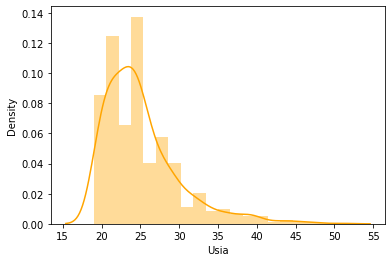

In [13]:
sn.distplot(df['Usia'],bins=20,color='orange')
plt.show()

In [14]:
df['Usia'] = df['Usia'].replace((19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 25.055307760927743, 26.0, 27.0, 28.0, 29.0, 30.0,), '<30')
df['Usia'] = df['Usia'].replace((31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 51.0), '>30')

df['Usia']

0       <30
1       <30
2       <30
3       <30
4       <30
       ... 
1150    <30
1151    <30
1152    <30
1153    <30
1154    <30
Name: Usia, Length: 1155, dtype: object

In [15]:
np.sort(df['Kota Domisili'].unique())

array(['Kab. Bandung Barat', 'Kab. Bantul', 'Kab. Banyumas',
       'Kab. Banyuwangi', 'Kab. Bekasi', 'Kab. Bogor', 'Kab. Boyolali',
       'Kab. Cilacap', 'Kab. Deli Serdang', 'Kab. Demak', 'Kab. Garut',
       'Kab. Gresik', 'Kab. Gunung Kidul', 'Kab. Indramayu',
       'Kab. Kapuas', 'Kab. Karawang', 'Kab. Kediri',
       'Kab. Lampung Barat', 'Kab. Lampung Timur', 'Kab. Lebak',
       'Kab. Lebong', 'Kab. Lombok Tengah', 'Kab. Magetan',
       'Kab. Padang Pariaman', 'Kab. Pandeglang', 'Kab. Ponorogo',
       'Kab. Probolinggo', 'Kab. Purbalingga', 'Kab. Sleman',
       'Kab. Sukabumi', 'Kab. Sukoharjo', 'Kab. Sumedang',
       'Kab. Tangerang', 'Kab. Wonogiri', 'Kota Bandar Lampung',
       'Kota Bandung', 'Kota Bekasi', 'Kota Bogor', 'Kota Cilegon',
       'Kota Cirebon', 'Kota Denpasar', 'Kota Depok',
       'Kota Jakarta Barat', 'Kota Jakarta Pusat', 'Kota Jakarta Selatan',
       'Kota Jakarta Timur', 'Kota Jakarta Utara', 'Kota Kediri',
       'Kota Magelang', 'Kota Makassar'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 [Text(0, 0, 'Kota Tangerang Selatan'),
  Text(1, 0, 'Kota Tangerang'),
  Text(2, 0, 'Kab. Tangerang'),
  Text(3, 0, 'Kota Depok'),
  Text(4, 0, 'Kota Jakarta Selatan'),
  Text(5, 0, 'Kota Jakarta Timur'),
  Text(6, 0, 'Kota Jakarta Barat'),
  Text(7, 0, 'Kab. Bogor'),
  Text(8, 0, 'Kota Bekasi'),
  Text(9, 0, 'Kota Bogor'),
  Text(10, 0, 'Kota Jakarta Pusat'),
  Text(11, 0, 'Kota Jakarta Utara'),
  Text(12, 0, 'Kab. Lebak'),
  Text(13, 0, 'Kota Surabaya'),
  Text(14, 0, 'Kab. Kediri'),
  Text(15, 0, 'Kab. Sleman'),
  Text(16, 0, 'Kota Semarang'),
  Text(17, 0, 'Kab. Bekasi'),
  Text(18, 0, 'Kota Makassar'),
  Text(19, 0, 'Kota Sukabumi'),
  Text(20, 0, 'Kota Bandung'),
  Text(21, 0, 'Kab. Sumedang'),

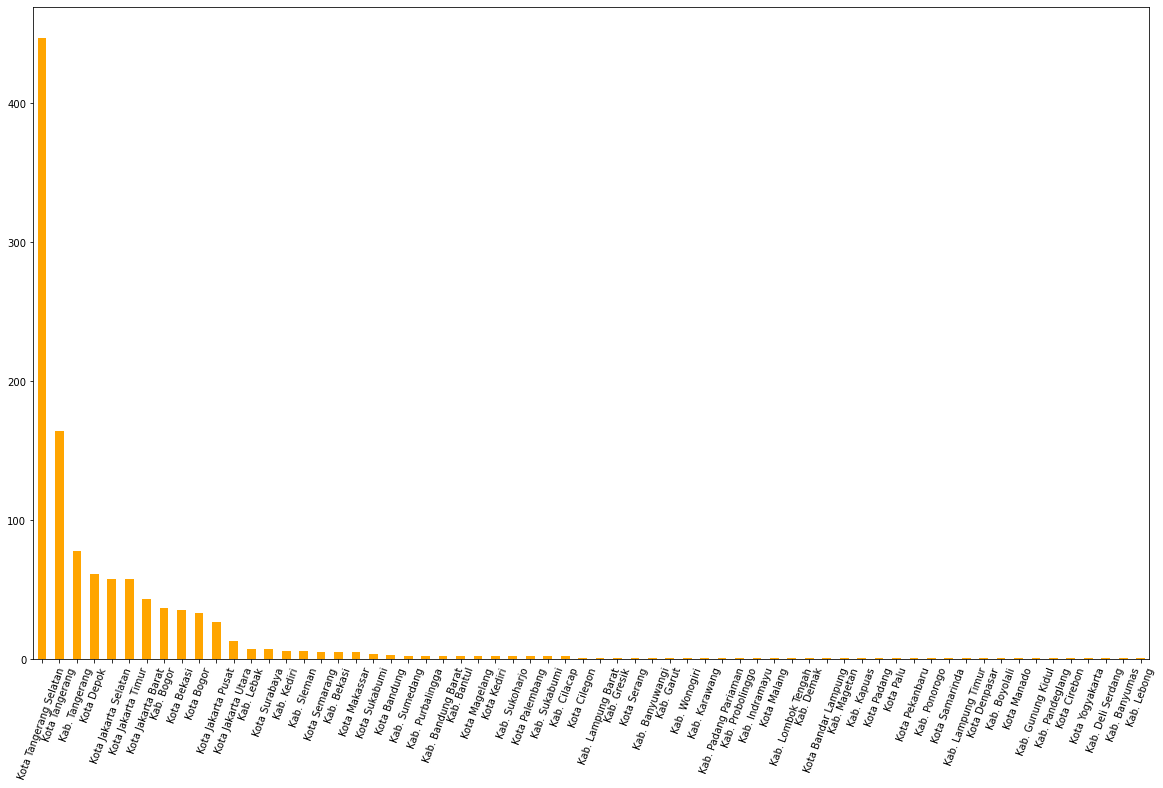

In [16]:
df['Kota Domisili'].value_counts().plot.bar(figsize=(20,12), color='orange')
plt.xticks(rotation=70)

In [17]:
df['Kota Domisili'] = df['Kota Domisili'].replace(('Kota Tangerang Selatan', 'Kota Tangerang', 'Kab. Tangerang'), 'Wilayah Tangerang')
df['Kota Domisili'] = df['Kota Domisili'].replace(('Kota Depok', 'Kota Jakarta Selatan', 'Kota Jakarta Timur',
       'Kota Jakarta Barat', 'Kota Bekasi', 'Kab. Bogor', 'Kota Bogor',
       'Kota Jakarta Pusat', 'Kota Jakarta Utara', 'Kab. Lebak',
       'Kota Surabaya', 'Kab. Kediri', 'Kab. Sleman', 'Kota Semarang',
       'Kab. Bekasi', 'Kota Makassar', 'Kota Sukabumi', 'Kab. Sumedang',
       'Kab. Purbalingga', 'Kab. Bandung Barat', 'Kab. Bantul',
       'Kota Magelang', 'Kota Kediri', 'Kab. Sukoharjo', 'Kota Bandung',
       'Kota Palembang', 'Kab. Sukabumi', 'Kab. Cilacap', 'Kota Cilegon',
       'Kab. Lampung Barat', 'Kab. Gresik', 'Kota Serang', 'Kab. Banyuwangi',
       'Kab. Garut', 'Kab. Wonogiri', 'Kab. Karawang', 'Kab. Padang Pariaman',
       'Kab. Probolinggo', 'Kab. Indramayu', 'Kota Malang',
       'Kab. Lombok Tengah', 'Kab. Demak', 'Kota Bandar Lampung',
       'Kab. Magetan', 'Kab. Kapuas', 'Kota Padang', 'Kota Palu',
       'Kota Pekanbaru', 'Kab. Ponorogo', 'Kota Samarinda',
       'Kab. Lampung Timur', 'Kota Denpasar', 'Kab. Boyolali', 'Kota Manado',
       'Kab. Gunung Kidul', 'Kab. Pandeglang', 'Kota Cirebon',
       'Kota Yogyakarta', 'Kab. Deli Serdang', 'Kab. Banyumas', 'Kab. Lebong'), 'Luar Wilayah Tangerang')

df['Kota Domisili']

0       Luar Wilayah Tangerang
1       Luar Wilayah Tangerang
2            Wilayah Tangerang
3            Wilayah Tangerang
4            Wilayah Tangerang
                 ...          
1150         Wilayah Tangerang
1151         Wilayah Tangerang
1152    Luar Wilayah Tangerang
1153    Luar Wilayah Tangerang
1154    Luar Wilayah Tangerang
Name: Kota Domisili, Length: 1155, dtype: object

In [18]:
df.head()

,Kota Domisili,Usia,Tingkat Pendidikan,Posisi Yang Dilamar,Pengalaman Pekerjaan,Jenis Kelamin,Status Kelengkapan,Tahapan
0,Luar Wilayah Tangerang,<30,S1,Telemarketing,Ada,Perempuan,Lengkap,Tolak
1,Luar Wilayah Tangerang,<30,S1,Telemarketing,Ada,Perempuan,Tidak Lengkap,Tolak
2,Wilayah Tangerang,<30,S1,Telemarketing,Ada,Perempuan,Lengkap,Diajukan
3,Wilayah Tangerang,<30,SMA/SMK,Telesales,Ada,Perempuan,Lengkap,Diajukan
4,Wilayah Tangerang,<30,SMA/SMK,Sales Marketing,Ada,Perempuan,Lengkap,Diajukan


In [19]:
for col in df:
    
    print(df[col].value_counts())

Wilayah Tangerang         689
Luar Wilayah Tangerang    466
Name: Kota Domisili, dtype: int64
<30    1018
>30     137
Name: Usia, dtype: int64
SMA/SMK    815
S1         269
D3          71
Name: Tingkat Pendidikan, dtype: int64
Telesales          1021
Telemarketing       110
Sales Marketing      24
Name: Posisi Yang Dilamar, dtype: int64
Ada          974
Tidak ada    181
Name: Pengalaman Pekerjaan, dtype: int64
Perempuan    710
Laki-Laki    445
Name: Jenis Kelamin, dtype: int64
Lengkap          975
Tidak Lengkap    180
Name: Status Kelengkapan, dtype: int64
Tolak       690
Diajukan    465
Name: Tahapan, dtype: int64


<AxesSubplot:ylabel='Tahapan'>

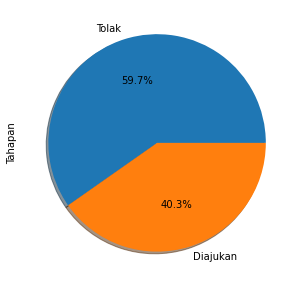

In [20]:
fig = plt.subplots(figsize=(15,5))
df['Tahapan'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

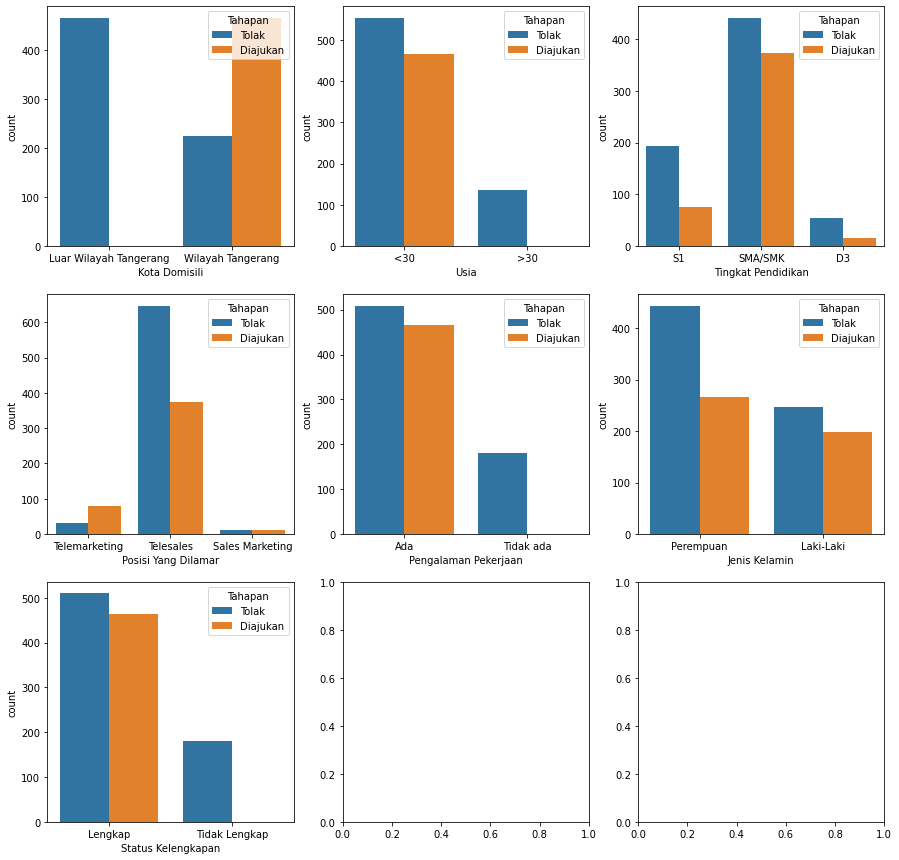

In [21]:
cat_var = ['Kota Domisili', 'Usia', 'Tingkat Pendidikan', 'Posisi Yang Dilamar', 'Pengalaman Pekerjaan', 'Jenis Kelamin', 'Status Kelengkapan']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for cat, ax in zip(cat_var, axes.flatten()):
    sn.countplot(cat, data=df, hue="Tahapan", ax=ax)

In [22]:
obj_kd = {'Luar Wilayah Tangerang':0, 'Wilayah Tangerang':1}
df['Kota Domisili'] = df['Kota Domisili'].replace(obj_kd)

# encode column usia
obj_usia = {'>30':0, '<30':1}
df['Usia'] = df['Usia'].replace(obj_usia)

# encode column pengalaman pekerjaan
obj_pp = {'Tidak ada':0, 'Ada':1}
df['Pengalaman Pekerjaan'] = df['Pengalaman Pekerjaan'].replace(obj_pp)

# encode column jenis kelamin
obj_jk = {'Perempuan':0, 'Laki-Laki':1}
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace(obj_jk)

# encode column status kelengkapan
obj_sk = {'Tidak Lengkap':0, 'Lengkap':1}
df['Status Kelengkapan'] = df['Status Kelengkapan'].replace(obj_sk)

# encode column tahapan
obj_tahapan = {'Tolak':0, 'Diajukan':1}
df['Tahapan'] = df['Tahapan'].replace(obj_tahapan)

In [23]:
le = LabelEncoder()
le.fit(df['Tingkat Pendidikan'])
list(le.classes_)

['D3', 'S1', 'SMA/SMK']

In [24]:
df['Tingkat Pendidikan']=le.transform(df['Tingkat Pendidikan'])

print(np.sort(df['Tingkat Pendidikan'].unique()))

[0 1 2]


In [25]:
le = LabelEncoder()
le.fit(df['Posisi Yang Dilamar'])
list(le.classes_)

['Sales Marketing', 'Telemarketing', 'Telesales']

In [26]:
df['Posisi Yang Dilamar']=le.transform(df['Posisi Yang Dilamar'])

print(np.sort(df['Posisi Yang Dilamar'].unique()))

[0 1 2]


In [27]:
df.head()

,Kota Domisili,Usia,Tingkat Pendidikan,Posisi Yang Dilamar,Pengalaman Pekerjaan,Jenis Kelamin,Status Kelengkapan,Tahapan
0,0,1,1,1,1,0,1,0
1,0,1,1,1,1,0,0,0
2,1,1,1,1,1,0,1,1
3,1,1,2,2,1,0,1,1
4,1,1,2,0,1,0,1,1


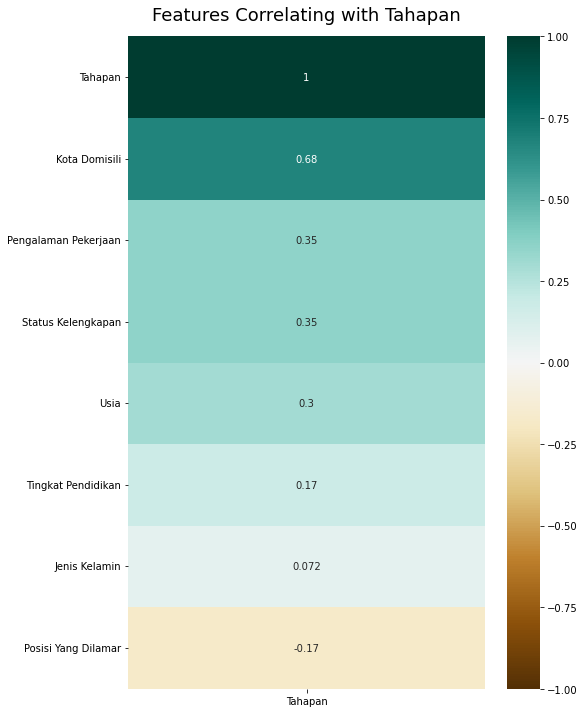

In [28]:
plt.figure(figsize=(8, 12))
heatmap = sn.heatmap(df.corr()[['Tahapan']].sort_values(by='Tahapan', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Tahapan', fontdict={'fontsize':18}, pad=16);

In [29]:
X = df.drop(['Jenis Kelamin', 'Tahapan'], axis=1)

y = df['Tahapan']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape

((808, 6), (347, 6))

In [33]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['entropy', 'gini']
    
}

In [34]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300]})

In [35]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 50}

In [36]:
CV_rfc.best_score_

0.9492753623188405

In [37]:
clf = RandomForestClassifier(random_state=42, max_features='auto', min_samples_leaf=2, n_estimators= 50, max_depth=4, criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))

[[194   6]
 [  0 147]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       200
           1       0.96      1.00      0.98       147

    accuracy                           0.98       347
   macro avg       0.98      0.98      0.98       347
weighted avg       0.98      0.98      0.98       347

Accuracy Score: 0.9827089337175793
Recall Score: 1.0
Precision Score: 0.9607843137254902


In [46]:
X_pred = pd.DataFrame(df, index=[0, 1], columns=X.columns)
X_pred

,Kota Domisili,Usia,Tingkat Pendidikan,Posisi Yang Dilamar,Pengalaman Pekerjaan,Status Kelengkapan
0,0,1,1,1,1,1
1,0,1,1,1,1,0


In [48]:
clf.predict(X_pred)

array([0, 0], dtype=int64)

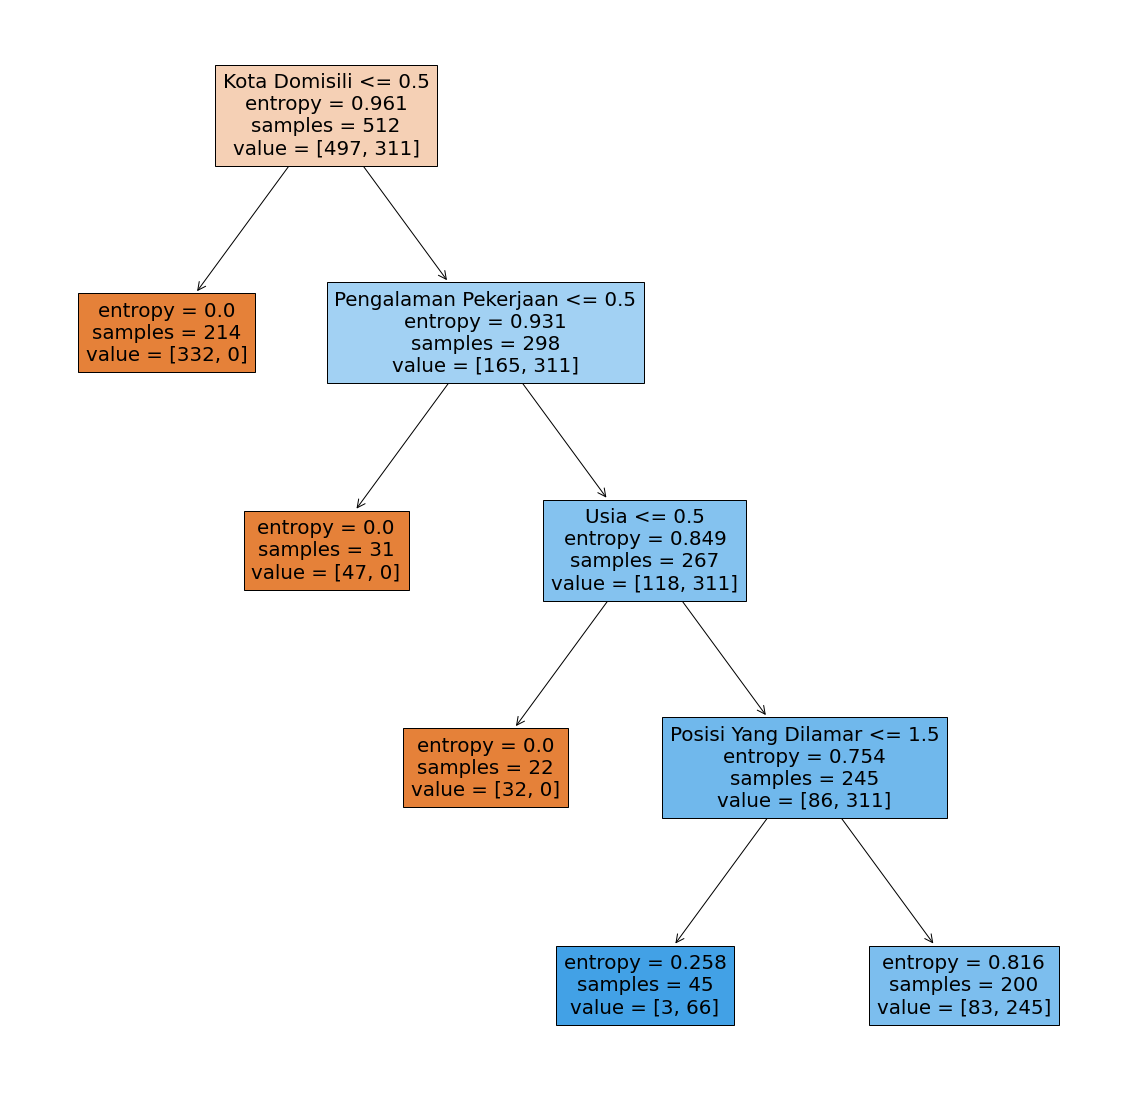

In [38]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf.estimators_[10], feature_names=X.columns, filled=True)

In [51]:
!pip install jcopml

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for jcopml: filename=jcopml-1.2.0-py2.py3-none-any.whl size=32032 sha256=5d0cfeac85298d00ae55f1ed39e3b0f1a1937c41be9472fd56bf37dc43f501ca
  Stored in directory: c:\users\popo\appdata\local\pip\cache\wheels\56\aa\d2\e70b67389032cdb2a52359f574a0961942e1ab980483955dee
Successfully built jcopml


In [52]:
from jcopml.utils import save_model

In [54]:
save_model(clf, "clf_datapelamar.pkl")

Model is pickled as model/clf_datapelamar.pkl


In [55]:
from jcopml.utils import load_model

In [63]:
model = load_model("model/clf_datapelamar.pkl")

In [64]:
model.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,